### 1. Write a python program which searches all the product under a particular product from www.amazon.in.
The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search
for guitars.

### 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. 
In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from time import sleep

In [2]:
opts = Options()

# Add headers
user_agent =  ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36')

In [3]:
opts.add_argument(f'user-agent={user_agent}')
opts.add_argument('--disable-blink-features=AutomationControlled')
opts.add_experimental_option('useAutomationExtension', False)
opts.add_experimental_option("excludeSwitches", ["enable-automation"])

In [4]:
driver = webdriver.Chrome('C:/Users/Usuario/Downloads/chromedriver_win32/chromedriver.exe', chrome_options=opts)
driver.get("https://www.amazon.in/")

sleep(1)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_6276/3249149288.py:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('C:/Users/Usuario/Downloads/chromedriver_win32/chromedriver.exe', chrome_options=opts)


In [5]:
search_bar = driver.find_element_by_xpath("//div[@id='nav-belt']//div[@class='nav-fill']//div[@class='nav-fill']//input[@id='twotabsearchtextbox']")

In [6]:
sleep(2)

In [7]:
search_bar.send_keys("laptop")

In [8]:
driver.find_element_by_xpath("//div[@id='nav-belt']//div[@class='nav-fill']//div[@class='nav-right']//div//span[@class='nav-search-submit-text nav-sprite nav-progressive-attribute']").click()

In [9]:
product_links_list = []

product_links = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 AdHolder sg-col s-widget-spacing-small sg-col-12-of-16']//div//div//div//div//div//div//div//div[@class='sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 s-list-col-right']//div//div//div//h2//a[@class='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal']")))

for i in product_links:
    #product_links = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 AdHolder sg-col s-widget-spacing-small sg-col-12-of-16']//div//div//div//div//div//div//div//div[@class='sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 s-list-col-right']//div//div//div//h2//a[@class='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal']")))
    product_links_list.append(i.get_attribute("href"))

In [10]:
driver.find_element_by_xpath("//div[@class='a-section a-spacing-none s-result-item s-flex-full-width s-widget s-widget-spacing-large']//div//div//span//a[@class='s-pagination-item s-pagination-next s-pagination-button s-pagination-separator']").click()

In [11]:
len(product_links_list)

6

In [12]:
print(driver.current_url)

https://www.amazon.in/s?k=laptop&page=2&qid=1656213407&ref=sr_pg_1


In [13]:
product_links_list1 = []

In [14]:
for x in range(1,4):
    driver.get(f'https://www.amazon.in/s?k=laptop&page={x}&qid=1656071559&ref=sr_pg_1')

    product_links1= WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='s-result-item s-asin sg-col-0-of-12 sg-col-16-of-20 AdHolder sg-col s-widget-spacing-small sg-col-12-of-16']//div//div//div//div//div//div//div//div[@class='sg-col sg-col-4-of-12 sg-col-8-of-16 sg-col-12-of-20 s-list-col-right']//div//div//div//h2//a[@class='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal']")))

    for i in product_links1:
        product_links_list1.append(i.get_attribute("href"))


In [15]:
print(product_links_list1)

['https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A07647221B5JMG1AVRRY2&url=%2FLenovo-IdeaPad-Celeron-Platinum-81VT009UIN%2Fdp%2FB09V7ZJYBN%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dlaptop%26qid%3D1656213419%26sr%3D8-1-spons%26psc%3D1&qualifier=1656213419&id=6216055958088171&widgetName=sp_atf', 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_atf_aps_sr_pg1_1?ie=UTF8&adId=A06935753PWO6CRZR9E2&url=%2FLenovo-IdeaPad-Celeron-Platinum-81WQ00MQIN%2Fdp%2FB09YJ1Q16L%2Fref%3Dsr_1_2_sspa%3Fkeywords%3Dlaptop%26qid%3D1656213419%26sr%3D8-2-spons%26psc%3D1&qualifier=1656213419&id=6216055958088171&widgetName=sp_atf', 'https://www.amazon.in/gp/slredirect/picassoRedirect.html/ref=pa_sp_mtf_aps_sr_pg1_1?ie=UTF8&adId=A0447151V9B07ZBYFE2A&url=%2FHP-Micro-Edge-Anti-Glare-Display-Graphics%2Fdp%2FB09MH9M5CV%2Fref%3Dsr_1_11_sspa%3Fkeywords%3Dlaptop%26qid%3D1656213419%26sr%3D8-11-spons%26psc%3D1&qualifier=1656213419&id=6216055958088171&widgetName=sp_m

In [16]:
data = {
    "brand_name": [],
    "price": []
}

These resources were very valuable to come up with this solution:
* https://www.youtube.com/watch?v=nCuPv3tf2Hg&list=RDCMUC8tgRQ7DOzAbn9L7zDL8mLg&start_radio=1&t=456s (Overall understanding on how to gather and scrape url list for Webscraping)
* https://stackoverflow.com/questions/71142430/how-to-get-the-text-using-xpath (How to get text using XPATH, check answer by undetected Selenium )
* https://stackoverflow.com/questions/69627784/scraper-looping-though-a-list-of-urls-using-selenium-without-getting-blocked (Webscraper looping through list of URLS without getting blocked, please check answer by user Shine J, it works perfect as a template)

In [17]:
for link in product_links_list1:
    driver = webdriver.Chrome("C:/Users/Usuario/Downloads/chromedriver_win32/chromedriver.exe", options=opts)
    driver.maximize_window()
    driver.get(link)
    # Click cookies popup
    #WebDriverWait(driver,30).until(EC.element_to_be_clickable((By.LINK_TEXT,"Continuer sans accepter"))).c
    #print("Processing")
    #brand_name = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='pc en_IN']//div[@class='a-container']//div[@class='centerColAlign centerColAlign-bbcxoverride']//div//div//h1[@class='a-size-large a-spacing-none']//span[@class='a-size-large product-title-word-break']"))).text
    #print(brand_name)
    #brand_name = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='pc en_IN']//div[@class='a-container']//div[@class='centerColAlign centerColAlign-bbcxoverride']//div//div//h1[@class='a-size-large a-spacing-none']//span[@class='a-size-large product-title-word-break']")))
    #price = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='pc en_IN']//div[@class='a-container']//div[@class='centerColAlign centerColAlign-bbcxoverride']//div[@class='celwidget']//div//span[@class='a-price aok-align-center reinventPricePriceToPayMargin priceToPay']"))).text
    try:
        brand_name = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, "//div[@class='pc en_IN']//div[@class='a-container']//div[@class='centerColAlign centerColAlign-bbcxoverride']//div//div//h1[@class='a-size-large a-spacing-none']//span[@class='a-size-large product-title-word-break']"))).text
        #print(brand_name)
        #brand_name = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='pc en_IN']//div[@class='a-container']//div[@class='centerColAlign centerColAlign-bbcxoverride']//div//div//h1[@class='a-size-large a-spacing-none']//span[@class='a-size-large product-title-word-break']").text))
        price = WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH, "//div[@class='pc en_IN']//div[@class='a-container']//div[@class='centerColAlign centerColAlign-bbcxoverride']//div[@class='celwidget']//div//span[@class='a-price aok-align-center reinventPricePriceToPayMargin priceToPay']"))).text
        #print(brand_name)
        #return_exchange = 
        #expected_delivery = 
        #availabilty =
        #product_url = link
    #product = {
    #        'brand_name': brand_name,
    #        'price': price
    #        }
        
    #laptop_list.append(product)
    #print("Saving: ", product['brand_name', 'price'])
        data["brand_name"].append(brand_name)
        data["price"].append(price)  
    
    
    except TimeoutException: 
        continue
    driver.quit()
    
#df = pd.DataFrame.from_dict(data)
#print(df)
#df.to_csv("data.csv")

In [19]:
import pandas as pd
df_1 = pd.DataFrame.from_dict(data)
df_1.to_csv("data1.csv")

### 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from time import sleep

In [2]:
opts = Options()

# Add headers
user_agent =  ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36')

In [4]:
opts.add_argument(f'user-agent={user_agent}')
opts.add_argument('--disable-blink-features=AutomationControlled')
opts.add_experimental_option('useAutomationExtension', False)
opts.add_experimental_option("excludeSwitches", ["enable-automation"])
opts.binary_location = "C:/Program Files/Google/Chrome/Application/chrome.exe"

In [8]:
try:
    
    driver = webdriver.Chrome(chrome_options=opts, executable_path="C:\Users\Usuario\Downloads\chromedriver_win32\chromedriver.exe", )
    #driver = webdriver.Chrome('C:/Users/Usuario/Downloads/chromedriver_win32/chromedriver.exe', chrome_options=opts)
    driver.get("https://www.google.com.com/")
    
    
    #for query in list_1:
    #    driver.find_element_by_xpath("//div[@class='qsbWrapper']//div[@class='qsb']//div[@class='keywordSugg']//div//div[@class='suggestor-wrapper active ']//div[@class='suggestor-box flex-row flex-wrap bottom ']//input[@class='suggestor-input ']").send_keys(query[0])
    #    driver.find_element_by_xpath("//div[@class='qsbWrapper']//div[@class='qsb']//div[@class='locationSugg']//div//div[@class='suggestor-wrapper active ']//div[@class='suggestor-box flex-row flex-wrap bottom ']//input[@class='suggestor-input ']").send_keys(query[1])

#driver.find_element_by_xpath("//div[@class='qsbWrapper']//div[@class='qsb']//div[@class='qsbSubmit']").click()

#job_title = driver.find_elements_by_xpath("//div[@class='list']//div[@class='jobTupleHeader']//div[@class='info fleft']//a[@class='title fw500 ellipsis']")
#job_title = [    title.text for title in job_title   ]
#print(job_title)

#sleep(10)
#driver.back()
#driver.refresh()
#sleep(2)
#driver.quit()

SyntaxError: 'continue' not properly in loop (Temp/ipykernel_17600/2616793405.py, line 8)

In [5]:
list_1 = [['fruits', 'cars', 'Machine Learning', 'Guitar', 'Cakes']]

Checked this post when encountered the WebDriverException selenium problem:
* https://stackoverflow.com/questions/53073411/selenium-webdriverexceptionchrome-failed-to-start-crashed-as-google-chrome-is

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys

options = Options()
options.binary_location = "C:\\Program Files\\Google\\Chrome\\Application\\chrome.exe"    #chrome binary location specified here
options.add_argument("--start-maximized") #open Browser in maximized mode
options.add_argument("--no-sandbox") #bypass OS security model
options.add_argument("--disable-dev-shm-usage") #overcome limited resource problems
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(options=options, executable_path=r'C:\Users\Usuario\Downloads\chromedriver_win32\chromedriver.exe')
driver.get('http://google.com/')

In [7]:
for query in list_1:

    driver.find_element_by_xpath("//div[@class='o3j99 ikrT4e om7nvf']//form[@method='GET']//div//div[@class='RNNXgb']//div[@class='a4bIc']//input[@class='gLFyf gsfi']").send_keys(query[0])
    driver.find_element_by_xpath("//div[@class='o3j99 ikrT4e om7nvf']//form[@method='GET']//div//div[@class='FPdoLc lJ9FBc']//input[@class='gNO89b']").click()

    

What do you want to search for? ronaldo
How many images do you want? 4
https://www.google.com.sg/search?q=ronaldo&source=lnms&tbm=isch&sa=X&ei=0eZEVbj3IJG5uATalICQAQ&ved=0CAcQ_AUoAQ&biw=939&bih=591





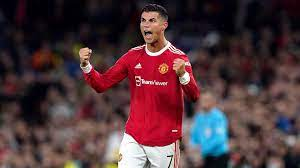
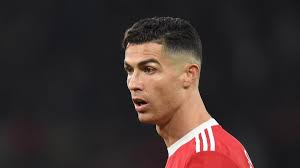
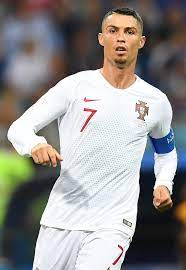
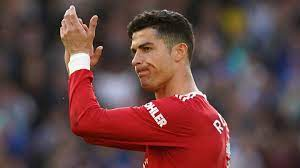

In [2]:


from selenium import webdriver
import os
import urllib
import time

path = r'C:\Users\Usuario\Downloads\chromedriver_win32\chromedriver.exe'

url_prefix = "https://www.google.com.sg/search?q="
url_postfix = "&source=lnms&tbm=isch&sa=X&ei=0eZEVbj3IJG5uATalICQAQ&ved=0CAcQ_AUoAQ&biw=939&bih=591"

save_folder = 'Train Images'

def main():
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    download_images()
    
def download_images():
    topic = input("What do you want to search for? ")
    n_images = int(input('How many images do you want? '))
    
    search_url = url_prefix+topic+url_postfix
    print(search_url)
    
    path = r'C:\Users\Usuario\Downloads\chromedriver_win32\chromedriver.exe'
    
    driver = webdriver.Chrome(path)
    driver.get(search_url)
    
    value = 0
    for i in range(3):
        driver.execute_script("scrollBy("+ str(value) +",+1000);")
        value += 1000
        time.sleep(1)
    
    elem1 = driver.find_element_by_id('islmp')
    sub = elem1.find_elements_by_tag_name('img')
    
    count=0
    for j,i in enumerate(sub):
        if j < n_images:
            src = i.get_attribute('src')                         
            try:
                if src != None:
                    src  = str(src)
                    print(src)
                    
                    urllib.request.urlretrieve(src, os.path.join(save_folder, topic+str(count)+'.jpg'))
                else:
                    raise TypeError
            except Exception as e:              #catches type error along with other errors
                print(f'fail with error {e}')
    
    driver.close()
    
if __name__ == "__main__":
    main()



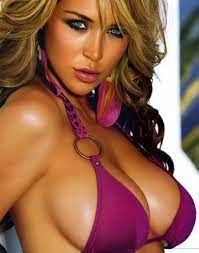

AttributeError: 'list' object has no attribute 'click'

In [9]:
import base64
import os
import requests
import time

from io import BytesIO
from PIL import Image
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

CHROME_DRIVER_LOCATION = r'C:\Users\Usuario\Downloads\chromedriver_win32\chromedriver.exe'
SEARCH_TERMS = ['very', 'hot', 'chicks']
TARGET_SAVE_LOCATION = os.path.join(r'c:\test', '_'.join([x.capitalize() for x in SEARCH_TERMS]),  r'{}.{}')
if not os.path.isdir(os.path.dirname(TARGET_SAVE_LOCATION)):
    os.makedirs(os.path.dirname(TARGET_SAVE_LOCATION))

def check_if_result_b64(source):
    possible_header = source.split(',')[0]
    if possible_header.startswith('data') and ';base64' in possible_header:
        image_type = possible_header.replace('data:image/', '').replace(';base64', '')
        return image_type
    return False

def get_driver():

    user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_3) AppleWebKit/537.36 (KHTML, like Gecko) ' \
                 'Chrome/80.0.3987.132 Safari/537.36'
    options = Options()
    #options.add_argument("--headless")
    options.add_argument(f'user-agent={user_agent}')
    options.add_argument("--disable-web-security")
    options.add_argument("--allow-running-insecure-content")
    options.add_argument("--allow-cross-origin-auth-prompt")

    new_driver = webdriver.Chrome(executable_path=CHROME_DRIVER_LOCATION, options=options)
    new_driver.get(f"https://www.google.com/search?q={'+'.join(SEARCH_TERMS)}&source=lnms&tbm=isch&sa=X")
    return new_driver



driver = get_driver()

first_search_result = driver.find_elements_by_xpath('//a/div/img')[0]
first_search_result.click()

right_panel_base = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.XPATH, f'''//*[@data-query="{' '.join(SEARCH_TERMS)}"]''')))
first_image = right_panel_base.find_elements_by_xpath('//*[@data-noaft="1"]')[0]
magic_class = first_image.get_attribute('class')
image_finder_xp = f'//*[@class="{magic_class}"]'


# initial wait for the first image to be loaded
# this part could be improved but I couldn't find a proper way of doing it
time.sleep(3)

# initial thumbnail for "to_be_loaded image"
thumbnail_src = driver.find_elements_by_xpath(image_finder_xp)[-1].get_attribute("src")

for i in range(10):

    # issue 4: All image elements share the same class. Assuming that you always click "next":
    # The last element is the base64 encoded thumbnail version is of the "next image"
    # [-2] element is the element currently displayed
    target = driver.find_elements_by_xpath(image_finder_xp)[-1]

    # you need to wait until image is completely loaded:
    # first the base64 encoded thumbnail will be displayed
    # so we check if the displayed element src match the cached thumbnail src.
    # However sometimes the final result is the base64 content, so wait is capped
    # at 5 seconds.
    wait_time_start = time.time()
    while (target.get_attribute("src") == thumbnail_src) and time.time() < wait_time_start + 5:
        time.sleep(0.2)
    thumbnail_src = driver.find_elements_by_xpath(image_finder_xp)[-1].get_attribute("src")
    attribute_value = target.get_attribute("src")
    print(attribute_value)

    # issue 1: if the image is base64, requests get won't work because the src is not an url
    is_b64 = check_if_result_b64(attribute_value)
    if is_b64:
        image_format = is_b64
        content = base64.b64decode(attribute_value.split(';base64')[1])
    else:
        resp = requests.get(attribute_value, stream=True)
        temp_for_image_extension = BytesIO(resp.content)
        image = Image.open(temp_for_image_extension)
        image_format = image.format
        content = resp.content
    # issue 2: if you 'open' a file, later you have to close it. Use a "with" pattern instead
    with open(TARGET_SAVE_LOCATION.format(i, image_format), 'wb') as f:
        f.write(content)
    # issue 3: this Xpath is bad """//*[@id="Sva75c"]/div/div/div[3]/div[2]/div/div[1]/div[1]/div/div[1]/a[2]/div""" if page layout changes, this path breaks instantly
    svg_arrows_xpath = '//div[@jscontroller]//a[contains(@jsaction, "click:trigger")]//*[@viewBox="0 0 24 24"]'
    next_arrow = driver.find_elements_by_xpath(svg_arrows_xpath)
    print(next_arrow)

In [3]:
print(image_finder_xp)

//*[@class="n3VNCb"]


In [10]:
print(next_arrow)

[]


In [2]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

options = webdriver.ChromeOptions()
# options.add_argument("--incognito")
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')


# # Create the csv at the good place
# csv_file = open('\path_to_folder.csv', 'w', newline='')
# csv_writer = csv.writer(csv_file)
# csv_writer.writerow(['titre', 'contrat', 'localisation', 'description'])
data = {
    "titre": [],
    "contrat": [],
    "localisation": [],
    "description": []
}

# A list of two URL's
listurl = ['https://candidat.pole-emploi.fr/offres/emploi/horticulteur/s1m1',
           'https://candidat.pole-emploi.fr/offres/emploi/ouvrier-agricole/s1m2']

# Loop through the list
for i in listurl:
    driver = webdriver.Chrome("C:/Users/Usuario/Downloads/chromedriver_win32/chromedriver.exe", options=options)
    driver.maximize_window()
    driver.get(i)
    # Click cookies popup
    WebDriverWait(driver,30).until(EC.element_to_be_clickable((By.LINK_TEXT,"Continuer sans accepter"))).click()

    # Get the elements
    try:
        zone = WebDriverWait(driver, 10).until(
           EC.presence_of_element_located((By.CLASS_NAME, "zone-resultats"))
           )
        offres = zone.find_elements_by_css_selector("div.media-body")
        offres2 = zone.find_elements_by_css_selector("div.media-right.media-middle.hidden-xs")
        for offre in offres:
            titre = (offre.find_element_by_css_selector("h2.t4.media-heading")).text
            print(titre)
            localisation = (offre.find_element_by_css_selector("span")).text
            print(localisation)
            description =(offre.find_element_by_class_name("description")).text
            print(description)
        for offre2 in offres2:
            contrat = (offre2.find_element_by_class_name("contrat")).text
            print(contrat)
        data["titre"].append(titre)
        data["contrat"].append(contrat)
        data["localisation"].append(localisation)
        data["description"].append(description)

    except Exception as ex:
        print(ex)
    driver.quit()
        
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("data.csv")

Ouvrier / Ouvrière agricole en maraîchage-horticulture
11 - CASTELNAUDARY
Vous serez chargé(e) d'assurer la castration des maÏs 4 postes sont à pourvoir à partir du 15 Juillet pour 1 mois environ à temps partiel: vous interviendrez les matins
Apprenti horticulteur H/F
05 - MONETIER ALLEMONT
La Maison Familiale Rurale de Ventavon recherche un apprenti horticulteur H/F pour un de ses clients sur Monetier Allemont. Vous préparerez le CAP Métiers de l'agriculture - production...
Apprenti horticulteur H/F
05 - MONETIER ALLEMONT
La Maison Familiale Rurale de Ventavon recherche un apprenti horticulteur H/F pour un de ses clients sur Monetier Allemont. Vous préparerez le BAC PRO Conduite de Productions Horticoles. Ce diplôme...
Educateur technique specialise horticulture (H/F)
90 - GIROMAGNY
Missions : - Travail éducatif et de formation auprès des jeunes déficients intellectuels de 16 à 20 ans - Collaboration avec les équipes pluri professionnelles, sous l'autorité du chef de...
Ouvrier / Ouvr

### 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [3]:
from pprint import pprint
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [4]:
driver = webdriver.Chrome(r"C:/Users/Usuario/Downloads/chromedriver_win32/chromedriver.exe")
driver.get('https://www.flipkart.com/')

In [5]:
search_bar = driver.find_element_by_class_name("_3704LK")

In [6]:
search_bar.clear()

In [7]:
search_bar.send_keys("Oneplus Nord")

In [8]:
search_bar.send_keys(Keys.RETURN)

### 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [3]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from selenium.webdriver import ActionChains
from time import sleep

In [9]:
driver = webdriver.Chrome(r"C:/Users/Usuario/Downloads/chromedriver_win32/chromedriver.exe")
wait = WebDriverWait(driver, 40)
driver.get("https://www.google.com/maps")
wait.until(EC.element_to_be_clickable((By.ID, "searchboxinput"))).send_keys("Caracas")
wait.until(EC.element_to_be_clickable((By.ID, "searchbox-searchbutton"))).click()
sleep(10)

try:
    ActionChains(driver).move_to_element(driver.find_element_by_xpath("//html/body")).context_click().perform()
    print(wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "ul[role='menu']>li div div[class*='text']:nth-of-type(1)"))).text)
except TimeoutException as ex:
    driver.close()
    


In [10]:
 print(wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "ul[role='menu']>li div div[class*='text']:nth-of-type(1)"))).text)

InvalidSessionIdException: Message: invalid session id


### 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from time import sleep

In [2]:
opts = Options()

# Add headers
user_agent =  ('Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36')

In [3]:
opts.add_argument(f'user-agent={user_agent}')
opts.add_argument('--disable-blink-features=AutomationControlled')
opts.add_experimental_option('useAutomationExtension', False)
opts.add_experimental_option("excludeSwitches", ["enable-automation"])

In [4]:
driver = webdriver.Chrome('C:/Users/Usuario/Downloads/Chrome_Driver_102/chromedriver.exe', chrome_options=opts)
driver.maximize_window()
driver.get("https://trak.in/")

sleep(1)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_22432/731382351.py:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('C:/Users/Usuario/Downloads/Chrome_Driver_102/chromedriver.exe', chrome_options=opts)


In [5]:
while True:
    try:
        driver.find_element_by_id("menu-item-51510").click()
        break
    except:
        continue

In [6]:
print(driver.current_url)

https://trak.in/india-startup-funding-investment-2015/


In [7]:
driver.get('https://trak.in/india-startup-funding-investment-2015/')

tables = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='dataTables_wrapper no-footer']")))

driver.get('https://trak.in/india-startup-funding-investment-2015/')

tables = WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.XPATH, "//div[@class='dataTables_wrapper no-footer']//table[@aria-describedby='tablepress-57_info']")))

In [8]:
len(tables)

45

In [9]:
tables

[<selenium.webdriver.remote.webelement.WebElement (session="461822c4810e12211924fac2a30cb33d", element="3ccf7b06-4287-4a5b-b2d8-77e4982441ee")>,
 <selenium.webdriver.remote.webelement.WebElement (session="461822c4810e12211924fac2a30cb33d", element="6045c088-83fc-4685-8abb-f7362142632c")>,
 <selenium.webdriver.remote.webelement.WebElement (session="461822c4810e12211924fac2a30cb33d", element="82354e65-d3ec-41f5-a12f-74add5f110e4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="461822c4810e12211924fac2a30cb33d", element="a22b1fcf-4f64-4db5-bcf1-ceef1ac193e1")>,
 <selenium.webdriver.remote.webelement.WebElement (session="461822c4810e12211924fac2a30cb33d", element="6648ce2f-7889-408f-8617-24e845055f23")>,
 <selenium.webdriver.remote.webelement.WebElement (session="461822c4810e12211924fac2a30cb33d", element="b0d32615-9a62-4fcf-852c-5dc260bfbd39")>,
 <selenium.webdriver.remote.webelement.WebElement (session="461822c4810e12211924fac2a30cb33d", element="dae8a3c0-2026-4aae-bc35-ea

The following solution was made up inspired on this resource: https://www.youtube.com/watch?v=JLDbAx6LAdo (Web Scraping Tutorial - HTML Tables - Python & Selenium [+ Excel File])

In [11]:
import pandas as pd

In [12]:
sr_no = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-1']")
#print(sr_no.text)
date = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-2']")
#print(date.text)
startup_name = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-3']")
#print(startup_name.text)
industry = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-4']")
#print(industry.text)
sub_industry = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-5']")
#print(sub_industry.text)
location = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-6']")
#print(location.text)
investors_name = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-7']")
#print(investors_name.text)
investment_type = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-8']")
#print(investment_type.text)
amount = driver.find_elements_by_xpath("//div[@class='dataTables_scroll']//div[@class='dataTables_scrollBody']//tr//td[@class='column-9']")
#print(amount.text)

funding_deals=[]

for i in range(len(sr_no)):
    temporary_data = {'Sr_No': sr_no[i].text,
                      'Date': date[i].text,
                      'Start_Up_Name': startup_name[i].text,
                      'Industry': industry[i].text,
                      'Sub_Industry': sub_industry[i].text,
                      'Location': location[i].text,
                      'Investors_Name': investors_name[i].text,
                      'Investment_Type': investment_type[i].text,
                      'Amount': amount[i].text}
    funding_deals.append(temporary_data)
    
df_data = pd.DataFrame(funding_deals)

In [13]:
df_data

,Sr_No,Date,Start_Up_Name,Industry,Sub_Industry,Location,Investors_Name,Investment_Type,Amount
0,1,01/04/2021,BYJU’S,Edu-tech,Online tutoring,Bengaluru,Innoven Capital,Series F,"460,000,000"
1,2,05/04/2021,Meesho,E-commerce,Online reselling platform,Bengaluru,SoftBank Vision Fund 2,Series E,"300,000,000"
2,3,14/04/2021,Swiggy,Online Food Delivery,Online Food Delivery,Bengaluru,"Amansa Holdings, Carmignac, Falcon Edge Capita...",Series J,"343,000,000"
3,4,07/04/2021,Groww,FinTech,Investment platform,Bengaluru,"MC Global Edtech, B Capital, Baron, others",Series D,"83,000,000"
4,5,14/04/2021,Beldara,E-commerce,Global B2B marketplace,Mumbai,Hindustan Media Ventures,Venture,"7,400,000"
...,...,...,...,...,...,...,...,...,...
387,6,09/07/2018,zippserv,Consumer Internet,Online Platform For Risk-Assessment Services F...,Bengaluru,Info Edge (India) Ltd,Seed/ Angel Funding,"440,000"
388,7,09/07/2018,Groww,Consumer Internet,Online Platform That Sells Direct Plans Of Mut...,Bengaluru,"Insignia Ventures Partners, Lightbridge Partne...",Seed/ Angel Funding,"1,100,000"
389,8,10/07/2018,Avenue Growth,Consumer Internet,Online Platform That Connects Brands With Free...,Gurugram,"Avtar Monga, chief operating office at IDFC Ba...",Seed/ Angel Funding,"437,000"
390,9,10/07/2018,iNICU,Healthcare,Med-tech Platform Providing Care For Newborns,Delhi,Venture Catalysts,Seed/ Angel Funding,N/A


### 7. Write a program to scrap all the available details of best gaming laptops from digit.in.